In [1]:
import torch
from models import Generator, Discriminator

In [2]:
gen = Generator(num_classes=67)
# gen

In [4]:
t1 = torch.zeros(1, 3, 36, 36)
c = torch.LongTensor([3])

out = gen(t1, c)
out.shape

torch.Size([1, 3, 128, 128])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


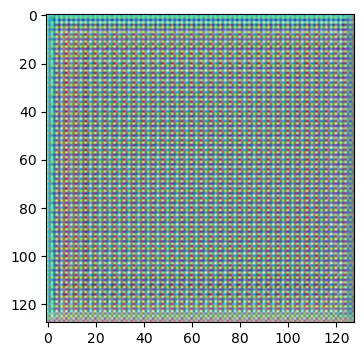

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(4, 4))
plt.imshow((out.squeeze().detach().permute(1,2,0).numpy()+1)/2)
plt.show()

In [2]:
disc = Discriminator(num_classes=67)

In [4]:
t2 = torch.zeros(2,3,128,128)
c = torch.Tensor([3])

out = disc(t2)
out.shape

torch.Size([2, 67])

In [4]:
disc

Discriminator(
  (init_conv): Conv2d(3, 84, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (cond_mlp): Sequential(
    (0): SinusoidalPositionEmbeddings()
    (1): Linear(in_features=128, out_features=512, bias=True)
    (2): GELU(approximate='none')
    (3): Linear(in_features=512, out_features=512, bias=True)
  )
  (downs): ModuleList(
    (0): ModuleList(
      (0): ConvNextBlock(
        (mlp): Sequential(
          (0): GELU(approximate='none')
          (1): Linear(in_features=512, out_features=84, bias=True)
        )
        (ds_conv): Conv2d(84, 84, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=84)
        (net): Sequential(
          (0): GroupNorm(1, 84, eps=1e-05, affine=True)
          (1): Conv2d(84, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (2): GELU(approximate='none')
          (3): GroupNorm(1, 256, eps=1e-05, affine=True)
          (4): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
        (res